# Лабораторная работа №3 по вычислительной математике

## Применение метода простой итерации и метода Ньютона для решения нелинейных уравнений и систем нелинейных уравнений

### Выполнил Филиппенко Павел -- студент группы Б01-009

#### Задание II.12.4 вариант и)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import math
import scipy.optimize

In [2]:
def f(x): return x**2 - np.exp(x)/5

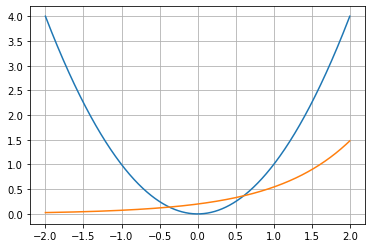

In [3]:
x = np.linspace(-2, 2, 1000)
plt.plot(x, x**2)
plt.plot(x, np.exp(x)/5)
plt.grid()

Для нелинейного уравнения 
$$x^2 - \frac{e^x}{5} = 0$$
составим метод простой итерации и докажем его сходимость.

Метод простой итерации:
$$x_{k + 1} = \pm \sqrt{\frac{e^x}{5}}$$

Достаточное условие сходимости метода простой итерации $x_{k+1} = \varphi(x_k)$:
$$|\varphi_x(\xi)'| < 1$$
где $\xi$ -- любое значение из области локализации.

Для нашего случая:
$$\varphi_x' = \frac{1}{2} \sqrt{\frac{e^x}{5}}$$

Заметим, что для любого значения из области локализации $|\varphi_x'| < 1 ~ \Rightarrow$ метод сходится.

In [4]:
def MSI(initial_sol):
    steps = 1000

    x_cur = initial_sol
    x_prev = 0

    for _ in range(steps):
        x_prev = x_cur

        if initial_sol >= 0:
            x_cur = math.sqrt(math.exp(x_prev)/5)
        else:
            x_cur = - math.sqrt(math.exp(x_prev)/5)

    return x_cur

In [5]:
solution1 = MSI(0.5)
print('The first solution by MSI %0.2f' %solution1)
print('Validate solution %0.2f' %(scipy.optimize.fsolve(f, [0.5])))

solution2 = MSI(-0.5)
print('The second solution by MSI %0.2f' %solution2)
print('Validate solution %0.2f' %(scipy.optimize.fsolve(f, [-0.5])))

The first solution by MSI 0.61
Validate solution 0.61
The second solution by MSI -0.37
Validate solution -0.37


In [6]:
F = {}
F['f1'] = lambda x, y : np.tan(x*y + 0.4) - x**2
F['f2'] = lambda x, y : 0.6 * x**2 + 2 * y**2 - 1

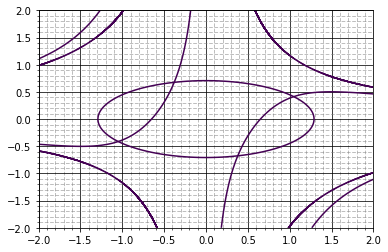

In [7]:
xrange = np.linspace(-2, 2, 10000)
yrange = np.linspace(-2, 2, 10000)
X, Y = np.meshgrid(xrange, yrange)
f1 = F['f1'](X,Y) 
f2 = F['f2'](X, Y)
plt.contour(X, Y, f1, [0])
plt.contour(X, Y, f2, [0])
plt.minorticks_on()
plt.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
plt.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

In [22]:
J = {}
J['df1x'] = lambda x, y : y / (np.cos(x*y + 0.4)**2) - 2*x
J['df1y'] = lambda x, y : y / (np.cos(x*y + 0.4)**2)
J['df2x'] = lambda x, y : 1.2*x
J['df2y'] = lambda x, y : 4*x

# return the value
# it's need to give x and y, cause the multiplication of functions is unsupported operation
def det_J(J, x, y):
    return J['df1x'](x, y) * J['df2y'](x, y) - J['df1y'](x, y) * J['df2x'](x, y)

In [23]:
def Newtons_M(init_x, init_y):
    steps = 10

    x_cur = init_x
    y_cur = init_y
    x_prev = 0
    y_prev = 0

    for _ in range(steps):
        x_prev = x_cur
        y_prev = y_cur

        x_cur = x_prev - (1 / det_J(J, x_prev, y_prev)) * (J['df2y'](x_prev, y_prev) * F['f1'](x_prev, y_prev) - J['df1y'](x_prev, y_prev) * F['f2'](x_prev, y_prev))
        y_cur = y_prev - (1 / det_J(J, x_prev, y_prev)) * (- J['df2x'](x_prev, y_prev) * F['f1'](x_prev, y_prev) + J['df1x'](x_prev, y_prev) * F['f2'](x_prev, y_prev))
        print(x_cur)
        print(y_cur)
        print()

    return x_cur, y_cur

In [26]:
solx, soly = Newtons_M(-0.5, -0.25)

-1.0875718674323887
-0.43622843977028336

-1.081444449066003
-0.41731446348773504

-1.0550693757525675
-0.41366467620995995

-1.049813941119596
-0.4128386775615721

-1.0486910440783523
-0.41266661507204355

-1.0484596254318235
-0.4126313353882649

-1.0484122891732064
-0.4126241263844366

-1.0484026213787392
-0.4126226543487427

-1.048400647474872
-0.41262235381136353

-1.0484002444822822
-0.4126222924541265

